# **Evaluating a model**

In [1]:
TEST_SET_FEATURES = "../01_data/test/well_educated_features.csv"
TEST_SET_LABELS = "../01_data/test/well_educated_labels.csv"

MODEL_NAME = "under_educated"

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import neural_network

from sklearn import metrics 

/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3

## **Loading Test Data**

In [3]:
X = np.loadtxt(TEST_SET_FEATURES, delimiter=",")
y = np.loadtxt(TEST_SET_LABELS, delimiter=",").reshape((len(X), 3))

## **Loading the Model**

In [4]:
model = neural_network.create_model(X)

model.load_weights("../03_models/"+MODEL_NAME+"/")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## **Inference**

In [5]:
predictions = model.predict(X)

In [6]:
predictions = predictions.argmax(axis=1)

## **Evaluation**

In [7]:
original_labels = y.argmax(axis=1)

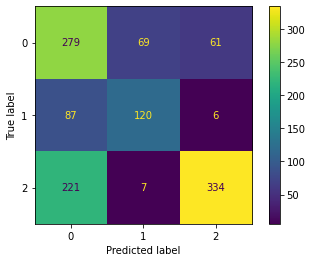

In [8]:
confusion_matrix = metrics.confusion_matrix(original_labels, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, ) 
cm_display.plot()
plt.show()

In [9]:
print("accuracy: %.4f"%(np.sum(original_labels == predictions)/len(predictions)))

accuracy: 0.6191


# **Evaluating multiple models**

In [24]:
TEST_PATH = "../01_data/test/"

In [25]:
MODELS = ["under_educated", "well_educated"]
DATASETS = ["under_educated", "college_educated", "well_educated"]

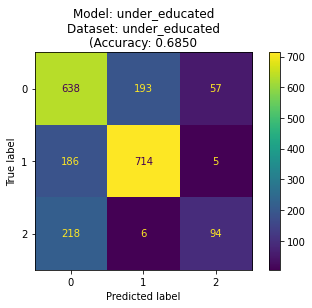

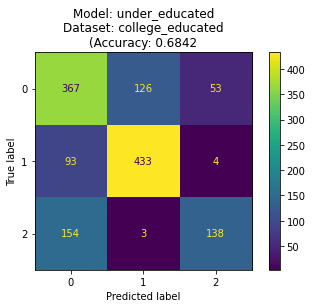

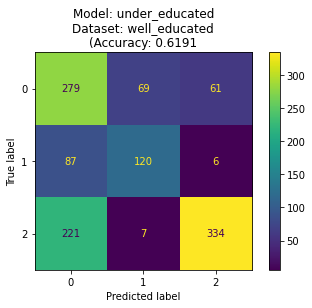

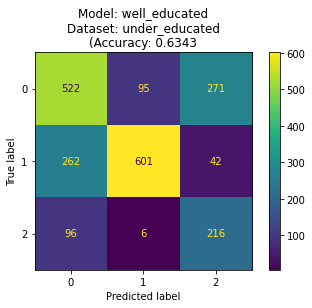

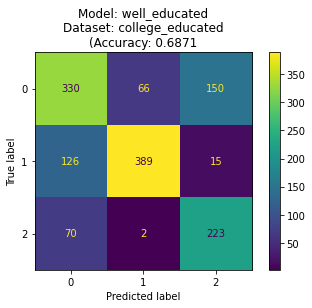

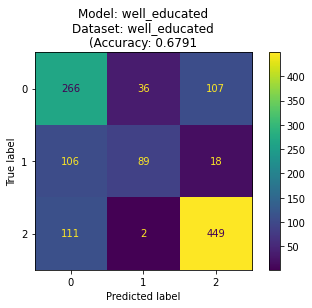

In [27]:
for model_name in MODELS:
    for dataset in DATASETS:
        X = np.loadtxt(TEST_PATH+dataset+"_features.csv", delimiter=",")
        y = np.loadtxt(TEST_PATH+dataset+"_labels.csv", delimiter=",").reshape((len(X), 3))
        
        model = neural_network.create_model(X)
        model.load_weights("../03_models/"+model_name+"/")
        
        predictions = model.predict(X)
        predictions = predictions.argmax(axis=1)
        original_labels = y.argmax(axis=1)
        
        accuracy = np.sum(original_labels == predictions)/len(predictions)
        confusion_matrix = metrics.confusion_matrix(original_labels, predictions)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, ) 
        cm_display.plot()
        plt.title("Model: "+model_name+"\nDataset: "+dataset+"\n(Accuracy: %.4f"%accuracy)
        plt.show()